# 導入不同策略 根據最新300根k棒產生的買賣序列 進行回測 畫出圖表

,Total P&L,Max Drawdown,Total Trades,Percent Profitable,Profit Factor
Overview performance,"8,852.32%",-60.31%,55,49.09%,1.63


,Total Trades,Number of Winning Trades,Number of Losing Trades,Average Trade (%),Average Win (%),Average Loss (%),Largest Win (%),Largest Loss (%)
Trades analysis,55,27,28,21.50%,58.11%,-13.80%,574.87%,-28.41%


,Sharpe Ratio,Sortino Ratio,Profit Factor
Risk/performance ratios,1.72,22.41,1.63


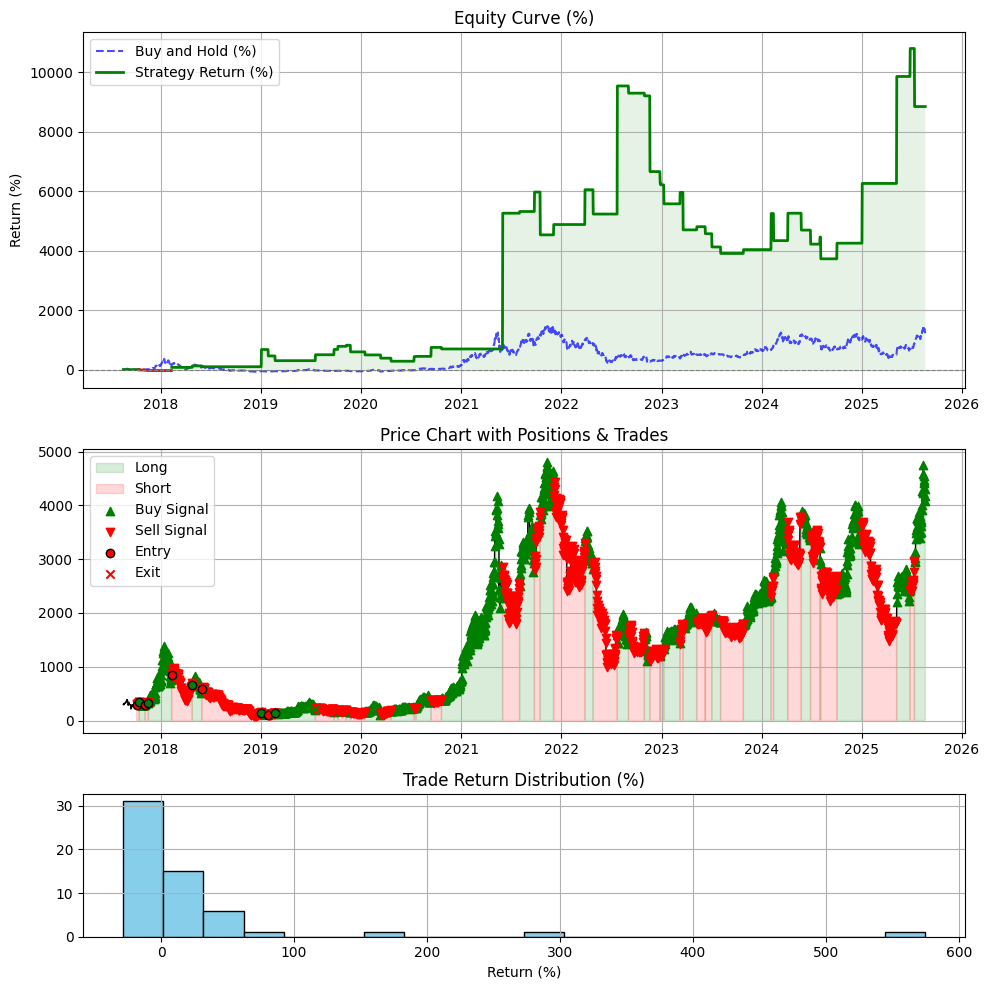

,timestamp,signal,close
2916,2025-08-11 00:00:00+00:00,1,4223.220000
2917,2025-08-12 00:00:00+00:00,1,4590.520000
2918,2025-08-13 00:00:00+00:00,1,4749.300000
2919,2025-08-14 00:00:00+00:00,1,4546.840000
2920,2025-08-15 00:00:00+00:00,1,4439.470000
2921,2025-08-16 00:00:00+00:00,1,4421.990000
2922,2025-08-17 00:00:00+00:00,1,4472.330000
2923,2025-08-18 00:00:00+00:00,1,4312.990000
2924,2025-08-19 00:00:00+00:00,1,4075.590000
2925,2025-08-20 00:00:00+00:00,1,4168.310000


In [5]:
import warnings 
warnings.filterwarnings('ignore')
from Technicalindicatorstrategy import vegas,turtle_strategy,macd,turtle_strategy_filter,MarketPerception
from Backtest.backtest import backtest_signals
from Plot.plot import display_trades_log_as_html,plot_backtest_result
from IPython.display import HTML
import pandas as pd
from datetime import datetime,timedelta
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
np.random.seed(42)  # ✅ 固定隨機性（可重現性）
import random
random.seed(42)

df_signals = MarketPerception.get_signals('ETHUSDT','1d',datetime.now(),6000)

result = backtest_signals(
    df_signals.copy(),
    initial_capital = 1000000, # 1000台幣
    fee_rate = 0.0000, # 合約手續費
    leverage = 1, # 槓桿
    allow_short = True, # 是否做空
    stop_loss = None,       # 停損閾值，例如0.05代表5%
    take_profit = None,     # 停利閾值
    capital_ratio = 1, # 每次使用的資金佔比
    max_hold_bars = 100000,# 最大持有K棒數
    delay_entry=False,
    risk_free_rate=0
    )  
display(pd.DataFrame(result['Overview performance'],index=['Overview performance']))
display(pd.DataFrame(result['Trades analysis'],index=['Trades analysis']))
display(pd.DataFrame(result['Risk/performance ratios'],index=['Risk/performance ratios']))
html_output = display_trades_log_as_html(result['trades_log'][-10:])
plot_backtest_result(result)
display(HTML(html_output))
display(df_signals.loc[df_signals['signal']!=0,['timestamp','signal','close']].tail(10).style.background_gradient())